# Lab | Cleaning numerical data

#### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Load the file. First look at its main features (head, shape, info), Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores), change effective to date column to datetime format.

In [2]:
# reading csv
customer_df = pd.read_csv("./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
# I convert to snake_case
customer_df.columns = map(lambda x:re.sub(r"([a-z]{1})([A-Z]{1})", r"\1 \2",x),customer_df.columns)
customer_df.columns = list(map(lambda x: x.lower(), customer_df.columns))
customer_df.columns = customer_df.columns.str.replace(' ','_')

In [3]:
# displaying information
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employment_status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

None

In [4]:
# changing column to datetime and removing time from it
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'], format = "%m/%d/%y")

#### 4. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [7]:
def is_continuous(column):
    # I basically assume a column is continous if it's both a number and unique_values/total_rows > 1%. Otherwise,
    # I will return 0 (non-continous -> discrete).
    if column.dtypes in ['int64','float64'] and len(column.unique())/len(column) > 0.01:
            return 1
    return 0

In [8]:
# I define blank dataframes to store the data
continuous_df = pd.DataFrame()
discrete_df = pd.DataFrame()

# Iterating for each column, checking its type and assigning accordingly. 
for column in customer_df.columns:
    if is_continuous(customer_df[column]) == 1:
        continuous_df = pd.concat([continuous_df, customer_df[column]], axis=1)
    else:
        discrete_df = pd.concat([discrete_df, customer_df[column]], axis=1)


### 5. Plot a correlation matrix, comment what you see. 

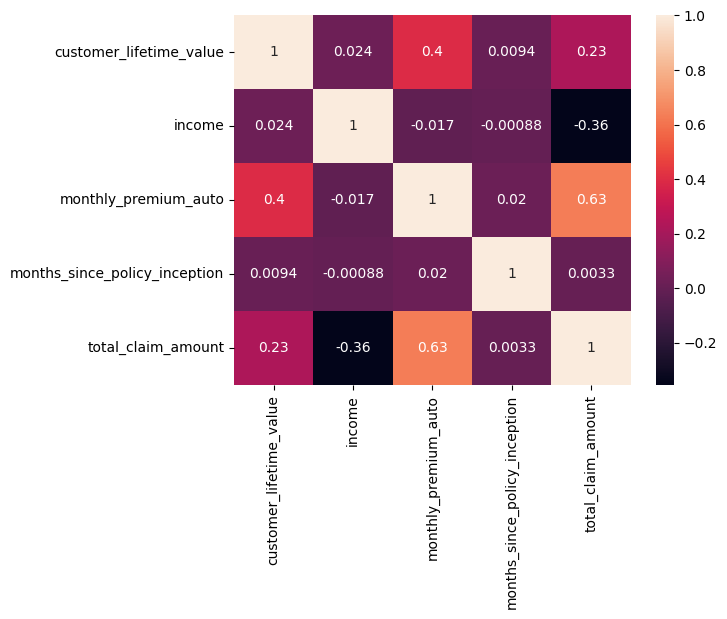

In [9]:
sns.heatmap(continuous_df.corr(), annot=True)
plt.show()
# I see some moderate correlations between monthly premium and 
# between customer_lifetime_value monthly_premium_auto and total_claim_amount

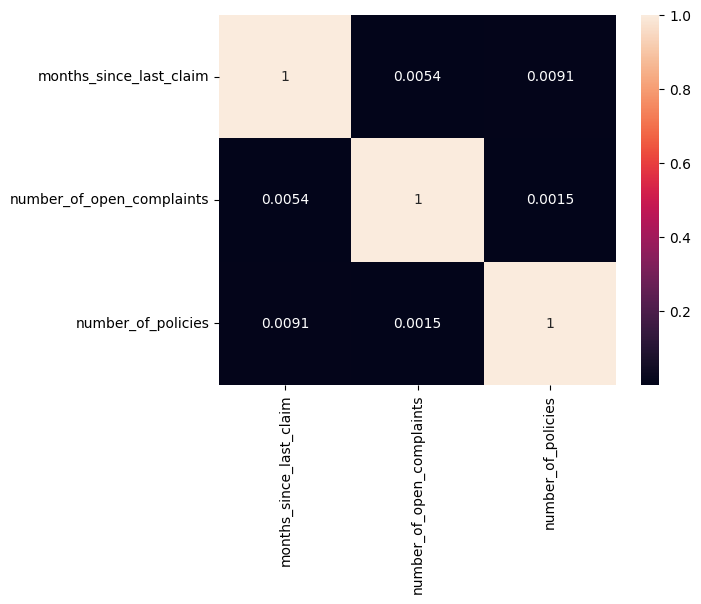

In [10]:
sns.heatmap(discrete_df.select_dtypes(np.number).corr(), annot=True)
plt.show()
# I see no correlations. 

#### Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!) Comment what you can see in the plots.

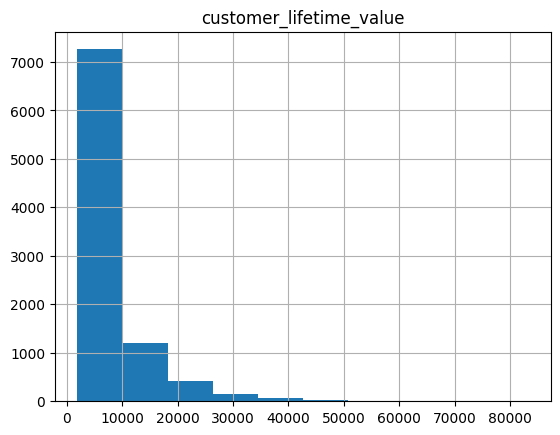

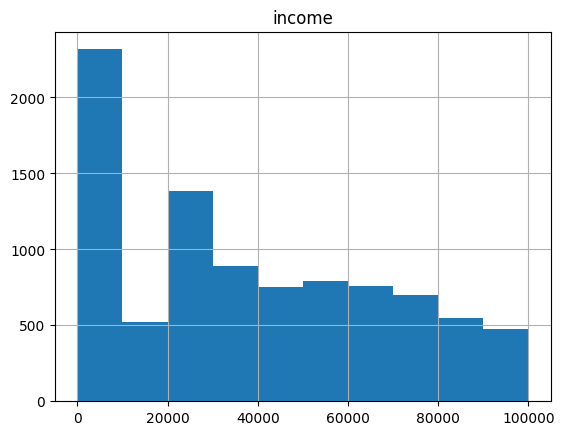

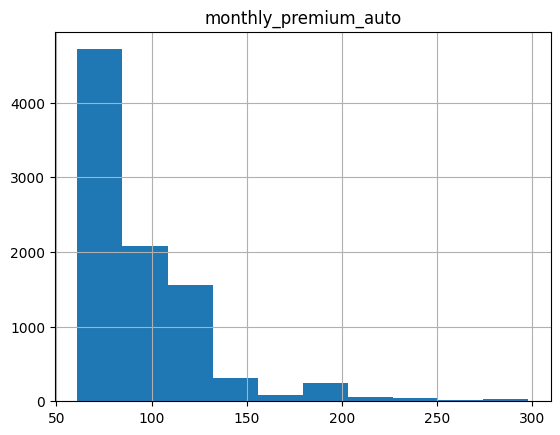

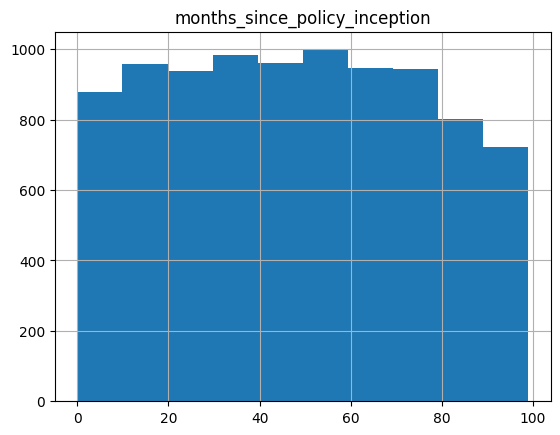

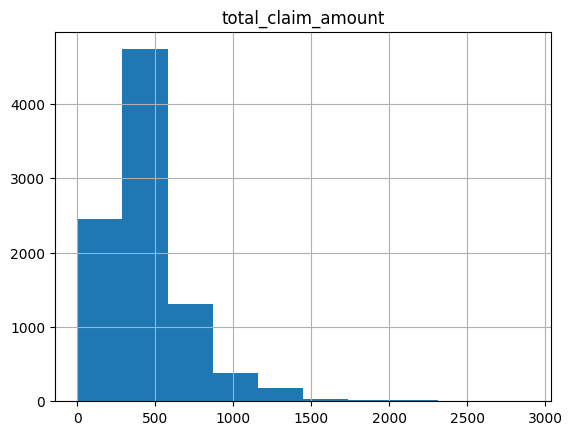

In [11]:
# Plotting continuous data
for column in continuous_df:
    continuous_df[column].hist()
    plt.title(column)
    plt.show()

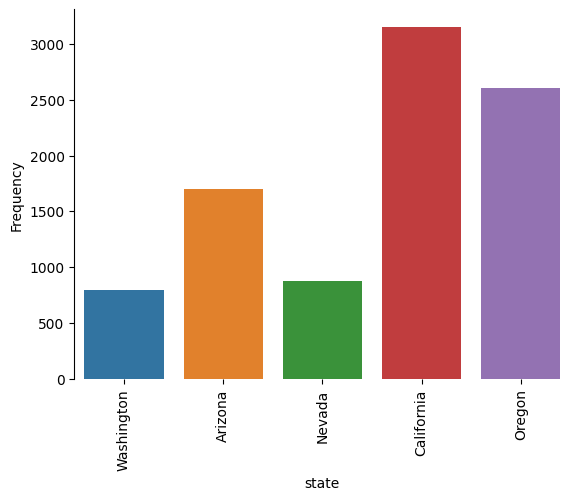

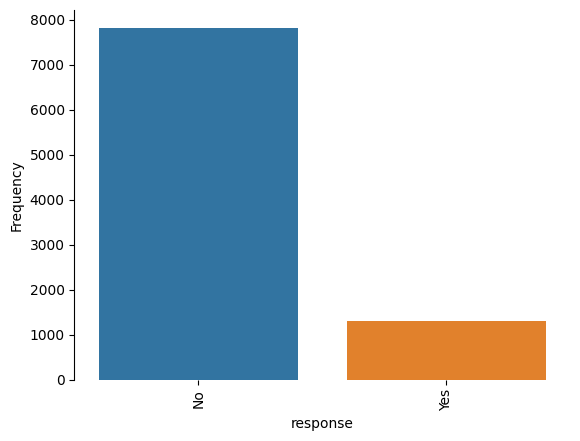

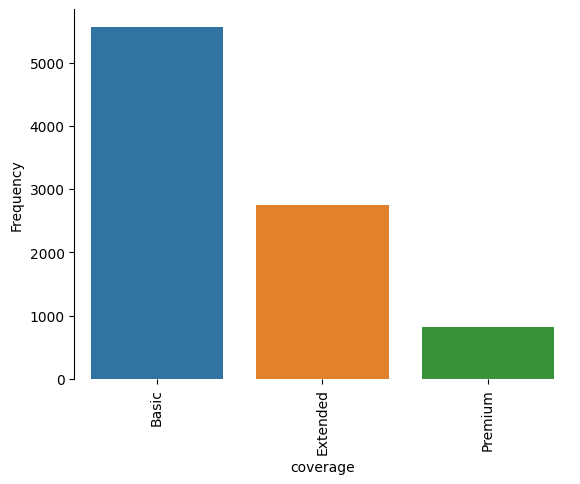

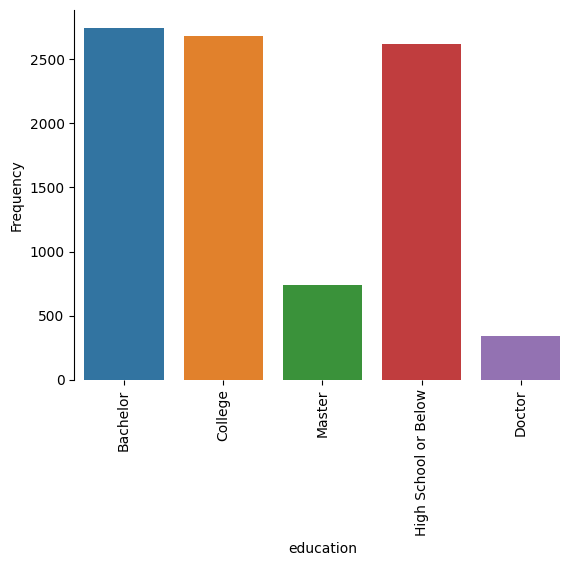

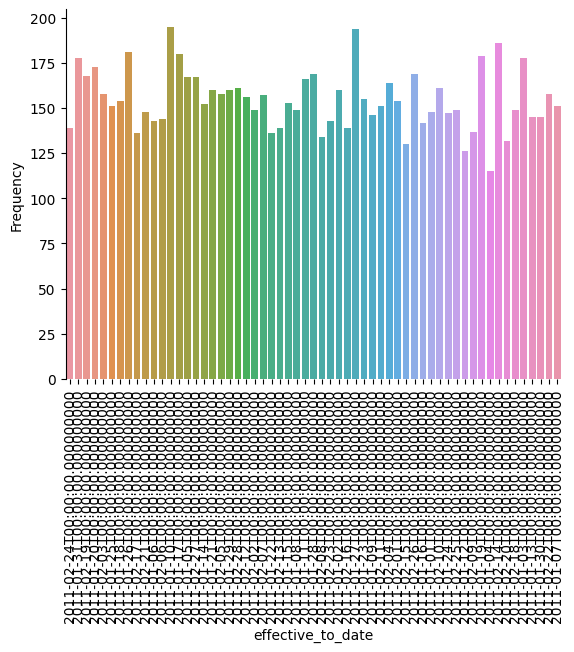

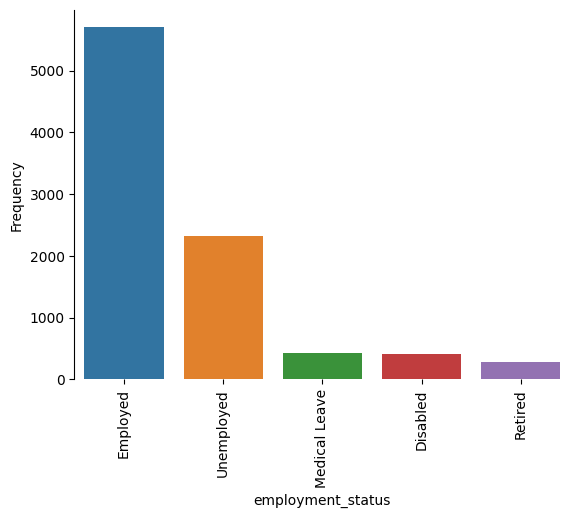

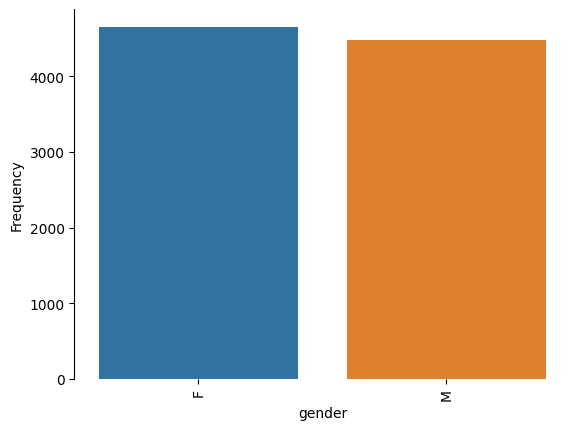

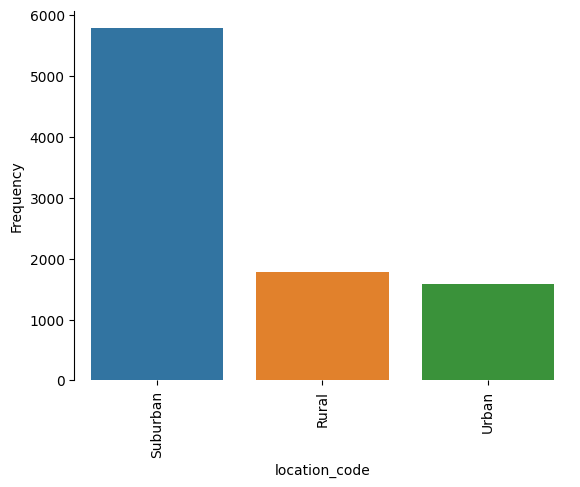

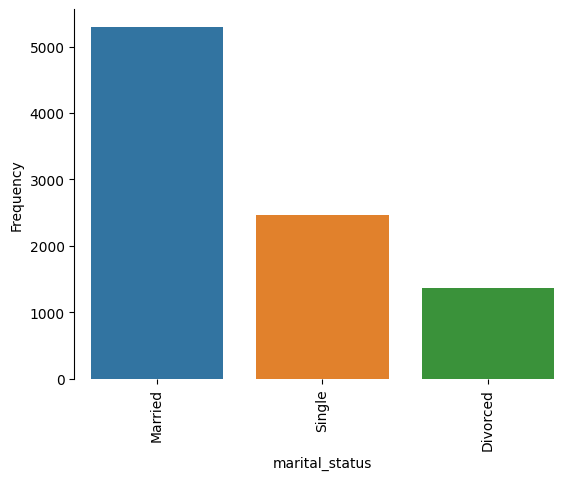

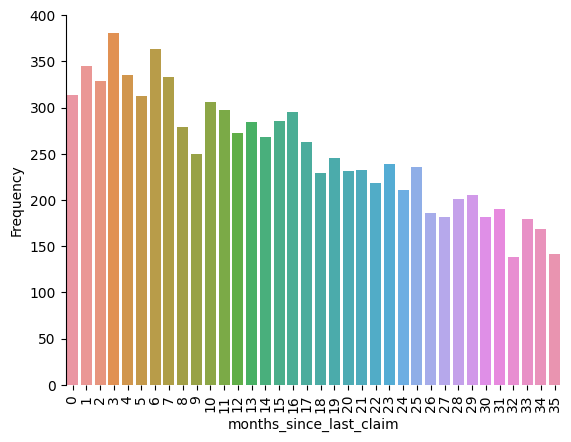

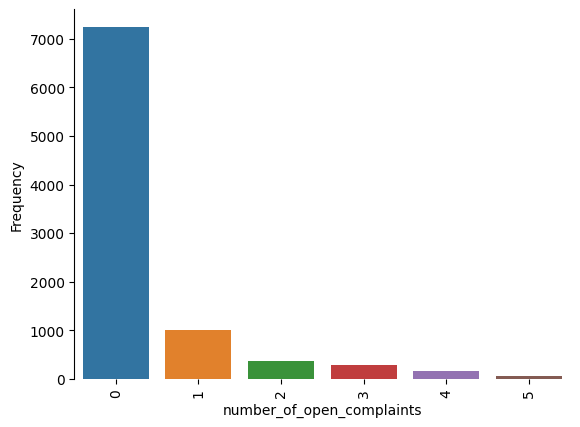

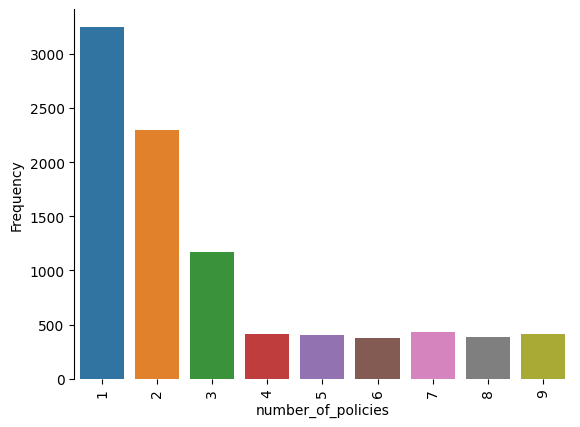

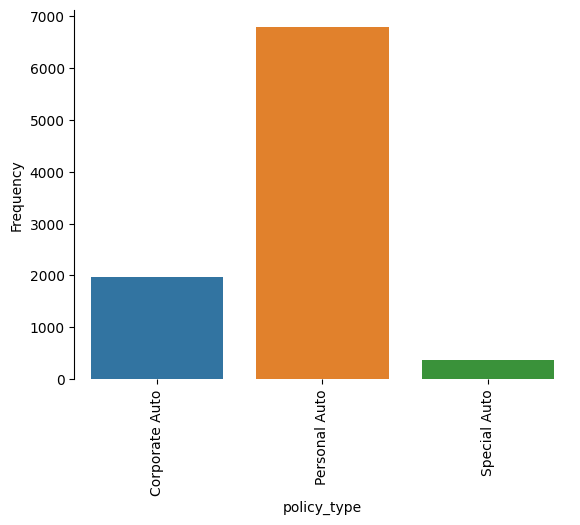

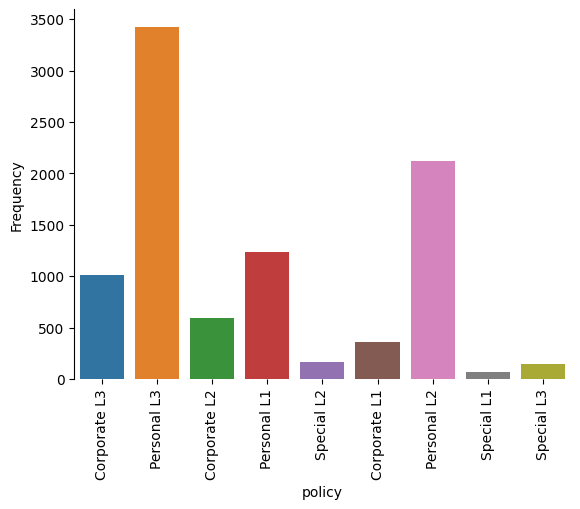

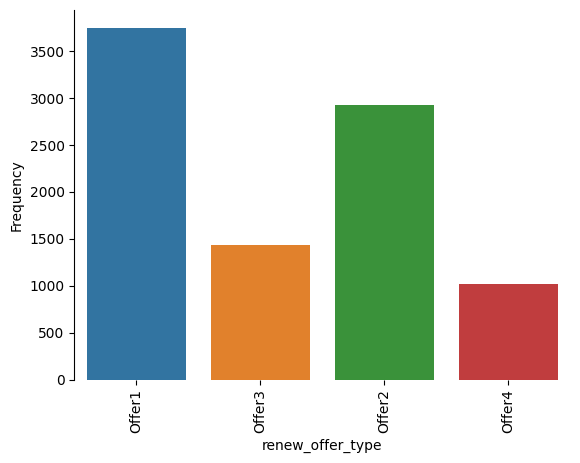

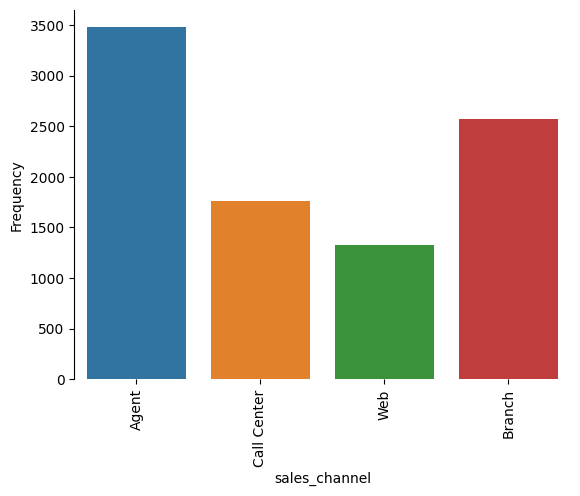

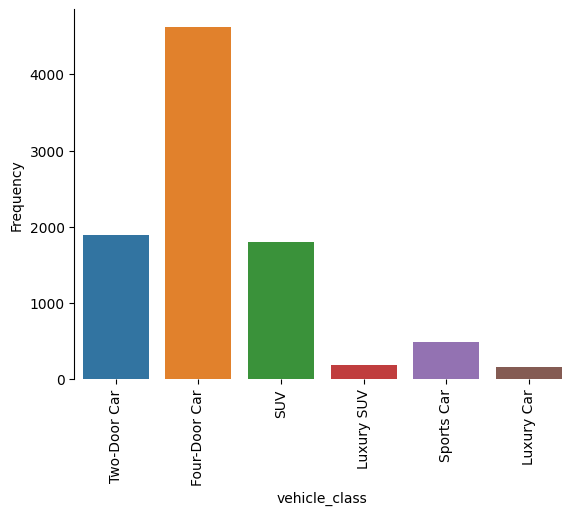

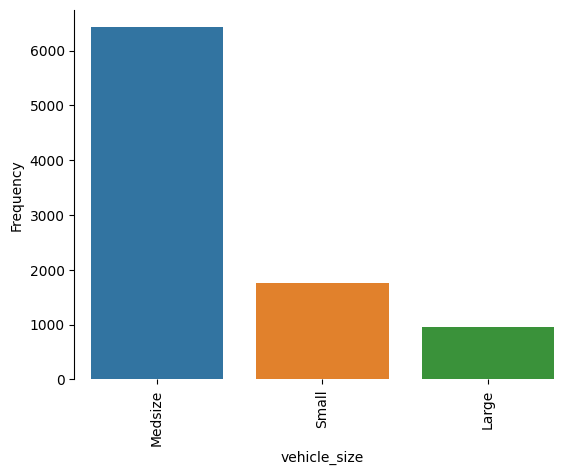

In [12]:
# plotting discrete data except 'customer' which is an ID
for column in discrete_df.drop(['customer'],axis=1).columns:
    # -- Show a plot of the total number of responses.
    sns.countplot(x = column, data=discrete_df)

    # Changing graph style
    sns.despine(bottom = True, left = False)
    plt.xticks(rotation = 90)
    plt.ylabel('Frequency')
    plt.show()

### 6. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!) Did you find outliers? Comment what you will do with them.

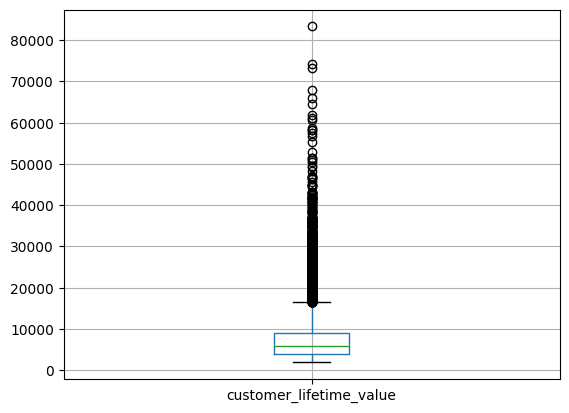

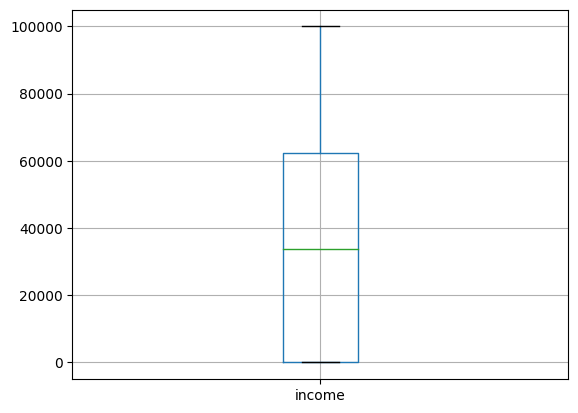

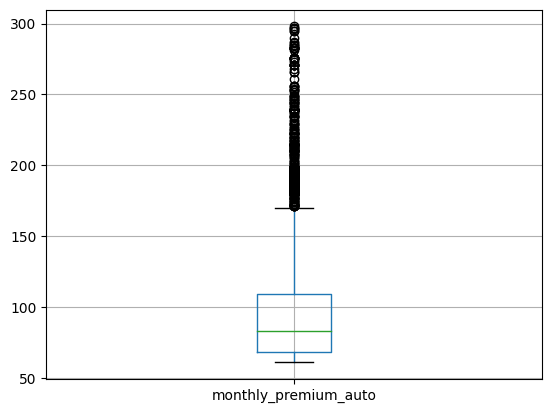

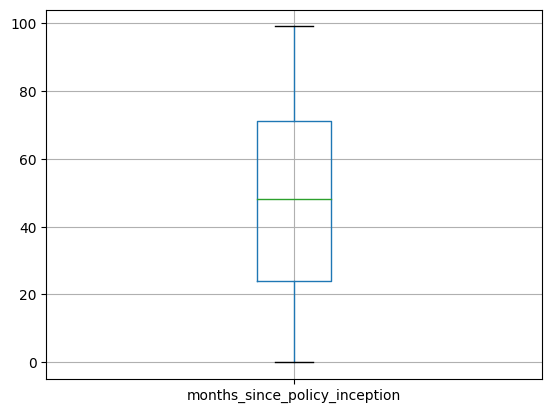

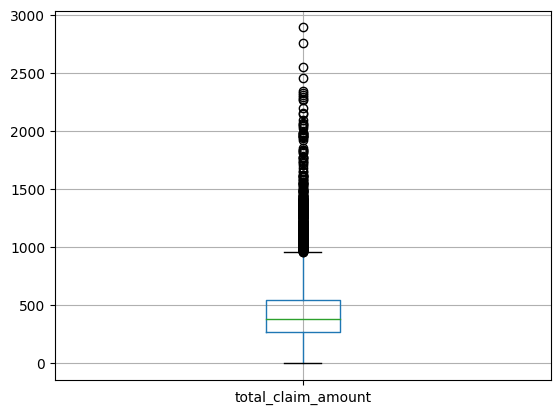

In [13]:
for column in continuous_df.columns:
    continuous_df[[column]].boxplot()
    plt.show()
    
# It seems customer_lifetime_value has some outliers over 51000:
continuous_df = continuous_df[continuous_df['customer_lifetime_value']<51000]
# , and total claim amount 4 over 2250.
continuous_df = continuous_df[continuous_df['total_claim_amount']<2250]
# , and monthly_premium_auto 4 over 260.
continuous_df = continuous_df[continuous_df['monthly_premium_auto']<260]

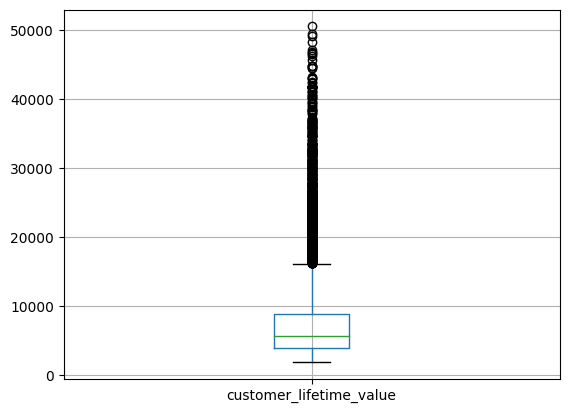

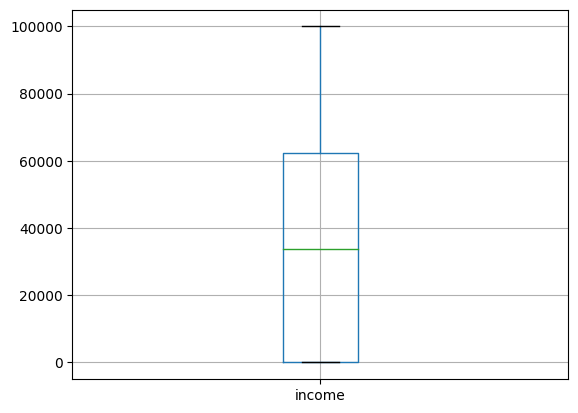

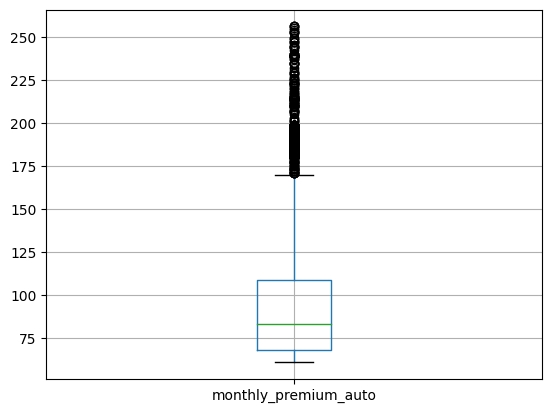

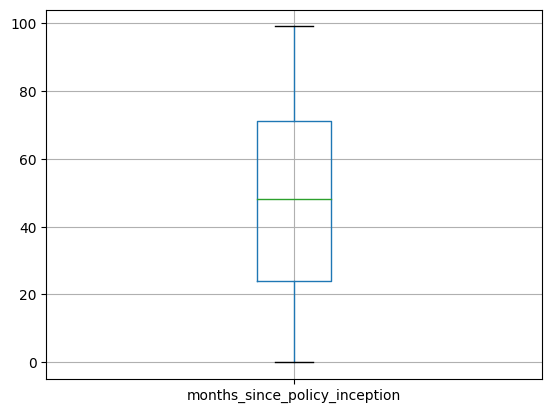

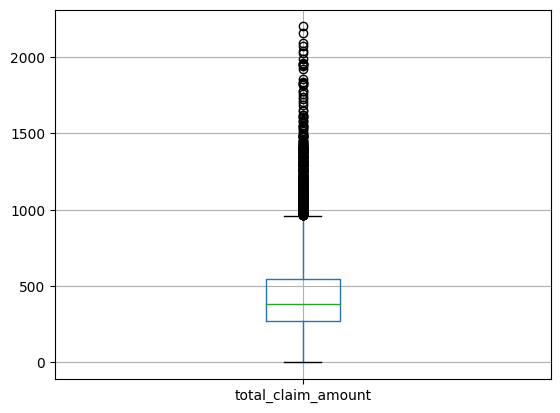

In [14]:
# and so the new plots without outliers are 
for column in continuous_df.columns:
    continuous_df[[column]].boxplot()
    plt.show()

#### Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [15]:
customer_df.isna().sum()
# we don't have null values so there's nothing to do about it.

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Lab | Cleaning categorical data

#### Find all of the categorical data. Save it in a categorical_df variable.

In [33]:
categorical_df = customer_df.select_dtypes(object)

#### Check for NaN values.


In [34]:
categorical_df.isna().sum()
# We have none 

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

#### Check all unique values of columns.

In [35]:
categorical_df.nunique()

customer             9134
state                   5
response                2
coverage                3
education               5
employment_status       5
gender                  2
location_code           3
marital_status          3
policy_type             3
policy                  9
renew_offer_type        4
sales_channel           4
vehicle_class           6
vehicle_size            3
dtype: int64

#### Check dtypes. Do they all make sense as categorical data?

In [36]:
categorical_df.dtypes
# Yes they do

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

#### Does any column contain alpha and numeric data? Decide how to clean it.

In [37]:
for column in categorical_df.columns[1:]:
    print('-----'+column+'-----')
    print(categorical_df[column].value_counts())

# I wanted to check for duplicates (for example California - CA) but every column seems to be in order.
# We still could simplify some columns a bit by grouping categories, but none of the columns have a long number
# of uniques values and none of them have a small account either, so I wouldn't change it.

-----state-----
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
-----response-----
No     7826
Yes    1308
Name: response, dtype: int64
-----coverage-----
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
-----education-----
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
-----employment_status-----
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64
-----gender-----
F    4658
M    4476
Name: gender, dtype: int64
-----location_code-----
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
-----marital_status-----
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
-----policy_type-----
Personal Auto  

#### Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.


In [38]:
# I guess I would leave it as it is.

#### Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?


In [39]:
categorical_df[['policy_type','policy']]
# It seems that policy_type information is contained within policy, so we could drop 'policy_type'
# and still have the same information. However I won't do it yet because I don't know if the column 
# will be useful later.

,policy_type,policy
0,Corporate Auto,Corporate L3
1,Personal Auto,Personal L3
2,Personal Auto,Personal L3
3,Corporate Auto,Corporate L2
4,Personal Auto,Personal L1
...,...,...
9129,Personal Auto,Personal L1
9130,Corporate Auto,Corporate L3
9131,Corporate Auto,Corporate L2
9132,Personal Auto,Personal L2


#### Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [40]:
categorical_df.nunique()

# If I was forced to do it I would for example combine "Master and PhD" in the education column, 
# "Medical_leave,disabled and Retired" for employment status
categorical_df['education'] = np.where(categorical_df['education'].isin(['Master','Doctor']),'post_bachelor', categorical_df['education'])
categorical_df['employment_status'] = np.where(categorical_df['employment_status'].isin(['Medical Leave','Disabled','Retired']),'Unable', categorical_df['employment_status'])

for column in categorical_df.columns[1:]:
    print('-----'+column+'-----')
    print(categorical_df[column].value_counts())


-----state-----
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
-----response-----
No     7826
Yes    1308
Name: response, dtype: int64
-----coverage-----
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
-----education-----
Bachelor                2748
College                 2681
High School or Below    2622
post_bachelor           1083
Name: education, dtype: int64
-----employment_status-----
Employed      5698
Unemployed    2317
Unable        1119
Name: employment_status, dtype: int64
-----gender-----
F    4658
M    4476
Name: gender, dtype: int64
-----location_code-----
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
-----marital_status-----
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
-----policy_type-----
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: in